In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)



:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numeric_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_market_data[numeric_columns])

# First few rows of DataFrame after normalization
print(df_market_data.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Copy the crypto names from the original data
#scaled_df['coin_id'] = df_market_data['coin_id']

# Set the coinid column as index
#scaled_df.set_index('coin_id', inplace=True)


# Display sample data
print(scaled_df.head(10))

   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   
5                     0.891871                    1.327295   
6                     0.011397                    2.572251   
7                     0.102530                    1.508001   
8                     0.077497                    0.334297   
9                     0.448952                   -0.190684   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4 

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Create an empty list to store the inertia values
inertia_values = []

print(inertia_values)

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(scaled_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


print(inertia_values)



[]


/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[287.0, 195.82021818036046, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382918, 43.7864349541418, 37.527739610654386, 33.07092554993108, 28.989073283679502, 24.53252735651686]


/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

print(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({'k_values': k_values, 'inertia_values': inertia_values})

print(elbow_df)

{'k_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'inertia_values': [287.0, 195.82021818036046, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382918, 43.7864349541418, 37.527739610654386, 33.07092554993108, 28.989073283679502, 24.53252735651686]}
    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.220364
5          6       52.829819
6          7       43.786435
7          8       37.527740
8          9       33.070926
9         10       28.989073
10        11       24.532527


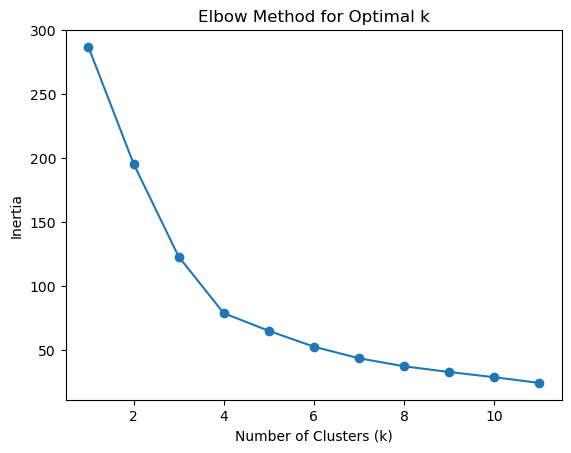

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Best Value for k = 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [12]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(scaled_df)

#scaled_df['cluster'] = clusters

# Print the resulting array of cluster values.
#cluster_values = scaled_df['clusters'].values
#print(cluster_values)

In [14]:
# Create a copy of the DataFrame


In [15]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(scaled_df)
# View the first five rows of the DataFrame. 


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = sum(pca.explained_variance_ratio_)

print(explained_variance_ratio)


0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8886

In [20]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['coin_id'] = scaled_df.index

# Copy the crypto names from the original data


# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head(5))

              PC1       PC2       PC3
coin_id                              
0       -0.600667  0.842760  0.461595
1       -0.458261  0.458466  0.952877
2       -0.433070 -0.168126 -0.641752
3       -0.471835 -0.222660 -0.479053
4       -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k_pca in k_values_pca:
    
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k_pca, random_state=42)

    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model_pca.fit(pca_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_model_pca.inertia_)


/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

In [23]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame({'k_values': k_values_pca, 'inertia_values': inertia_values_pca})

print(elbow_df_pca)

    k_values  inertia_values
0          1      256.874086
1          2      168.811896
2          3       93.774626
3          4       49.665497
4          5       37.878747
5          6       27.618972
6          7       21.182776
7          8       17.091637
8          9       13.668325
9         10       10.559358
10        11        8.177490


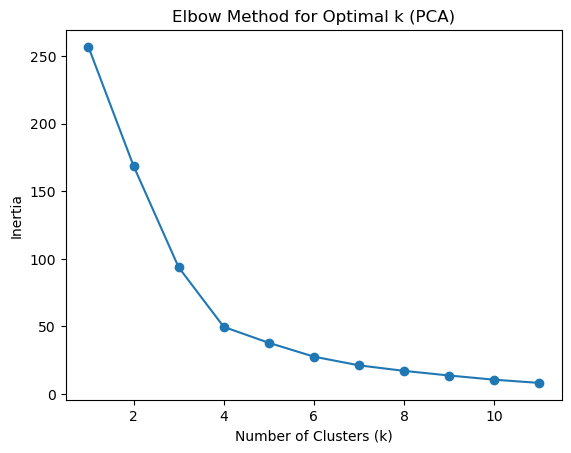

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df_pca['k_values'], elbow_df_pca['inertia_values'], marker='o')
plt.title('Elbow Method for Optimal k (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** NO

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
best_k_PCA = 4

kmeans_pca = KMeans(n_clusters=best_k_PCA, random_state=42)

In [26]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

/Users/josephdominicyiga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)
# Print the resulting array of cluster values.
print(clusters_pca)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters
pca_df['cluster_pca'] = clusters_pca

# Display sample data
print(pca_df.head())


              PC1       PC2       PC3  cluster_pca
coin_id                                           
0       -0.600667  0.842760  0.461595            3
1       -0.458261  0.458466  0.952877            3
2       -0.433070 -0.168126 -0.641752            0
3       -0.471835 -0.222660 -0.479053            0
4       -1.157800  2.041209  1.859715            3


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster_pca',
    hover_cols=['coin_id'],
    title='Clustered Cryptocurrencies with PCA Data',
    xlabel='PC1',
    ylabel='PC2',
    cmap='Category10'
)

scatter_plot_pca

:NdOverlay   [cluster_pca]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Create individual scatter plots for each cluster
scatter_plots = []
for cluster_label in pca_df['cluster_pca'].unique():
    scatter_plot = pca_df[pca_df['cluster_pca'] == cluster_label].hvplot.scatter(
        x='PC1',
        y='PC2',
        hover_cols=['coin_id'],
        title=f'Cluster {cluster_label}',
        xlabel='Principal Component 1 (PC1)',
        ylabel='Principal Component 2 (PC2)',
    )
    scatter_plots.append(scatter_plot)

# Create a composite plot by combining individual scatter plots
composite_plot = scatter_plots[0]
for scatter_plot in scatter_plots[1:]:
    composite_plot += scatter_plot

# Display the composite plot
composite_plot

:Layout
   .Scatter.I   :Scatter   [PC1]   (PC2,coin_id)
   .Scatter.II  :Scatter   [PC1]   (PC2,coin_id)
   .Scatter.III :Scatter   [PC1]   (PC2,coin_id)
   .Scatter.IV  :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 